In [1]:
# 0. MNIST data
# Install tensorflow and keras
# pip install tensorflow keras

from tensorflow import keras
keras.datasets.mnist.load_data()

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [2]:
# a) # Check help() on keras.datasets.mnist.load_data()
help(keras.datasets.mnist.load_data)

Help on function load_data in module keras.src.datasets.mnist:

load_data(path='mnist.npz')
    Loads the MNIST dataset.
    
    This is a dataset of 60,000 28x28 grayscale images of the 10 digits,
    along with a test set of 10,000 images.
    More info can be found at the
    [MNIST homepage](http://yann.lecun.com/exdb/mnist/).
    
    Args:
        path: path where to cache the dataset locally
            (relative to `~/.keras/datasets`).
    
    Returns:
        Tuple of NumPy arrays: `(x_train, y_train), (x_test, y_test)`.
    
    **`x_train`**: `uint8` NumPy array of grayscale image data with shapes
      `(60000, 28, 28)`, containing the training data. Pixel values range
      from 0 to 255.
    
    **`y_train`**: `uint8` NumPy array of digit labels (integers in range 0-9)
      with shape `(60000,)` for the training data.
    
    **`x_test`**: `uint8` NumPy array of grayscale image data with shapes
      `(10000, 28, 28)`, containing the test data. Pixel values range
  

In [3]:
# b) Check the shapes of X_train, y_train, X_test, y_test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
# c) How many images are in X_train?
print(X_train.shape[0])


60000


0 255


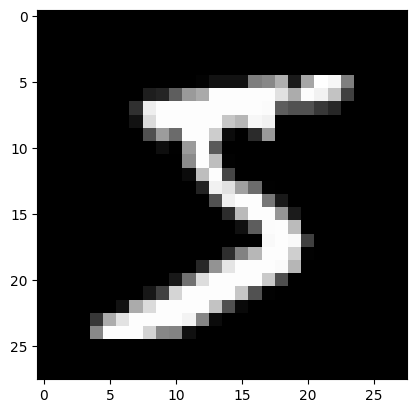

In [5]:
import matplotlib.pyplot as plt
# d) Check smallest and largest value a of sample image
print(X_train.min(), X_train.max())

# Plot image using plt.imshow()
plt.imshow(X_train[0], cmap='gray')

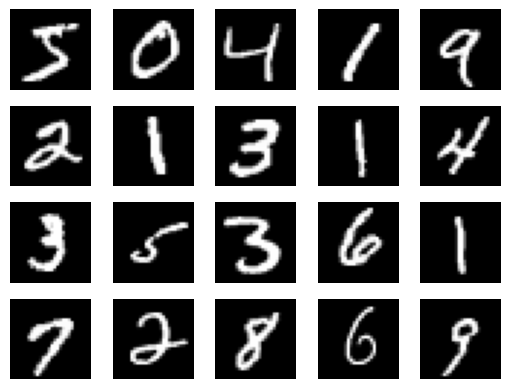

In [6]:
# e) Plot 20 sample images
fig, ax = plt.subplots(4, 5)
for i in range(20):
    ax[i//5, i%5].imshow(X_train[i], cmap='gray')
    ax[i//5, i%5].axis('off')
plt.show()


In [7]:
# f) Reshape X_train & X_test to appropriate shapes for 2D
X_train_2D = X_train.reshape(X_train.shape[0], -1)
X_test_2D = X_test.reshape(X_test.shape[0], -1)

In [8]:
# 1. Train|Test Validation Split
# Do a split on the training data to get validation data
from sklearn.model_selection import train_test_split
X_train_2D, X_val_2D, y_train, y_val = train_test_split(X_train_2D, y_train, test_size=0.2, random_state=42)


k=1, accuracy=0.86
k=2, accuracy=0.86
k=3, accuracy=0.87
k=4, accuracy=0.89
k=5, accuracy=0.895
k=6, accuracy=0.87
k=7, accuracy=0.87
k=8, accuracy=0.865
k=9, accuracy=0.855
k=10, accuracy=0.855


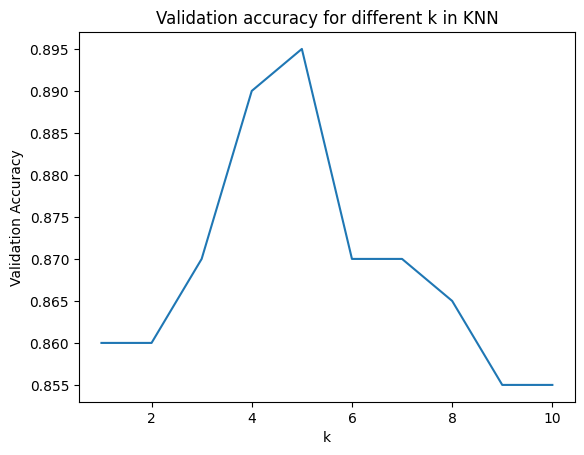

In [16]:
# 2. Hyperparameter Tuning
import numpy as np
import scipy.sparse as sp
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convert X_train_2D and X_val_2D to sparse matrices
X_train_sparse = sp.csr_matrix(X_train_2D)
X_val_sparse = sp.csr_matrix(X_val_2D)

# Define a set of k-values
k_values = np.arange(1, 11)

# List to store accuracy scores
accuracy_scores = []

# Loop through k-values
for k in k_values:
    # Create a KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model using training data
    knn.fit(X_train_sparse, y_train)
    # Predict on validation data
    y_pred = knn.predict(X_val_sparse)
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)
    # Append to list
    accuracy_scores.append(accuracy)
    print(f'k={k}, accuracy={accuracy}')

# Elbow plot validation accuracy for different k in KNN
plt.plot(k_values, accuracy_scores)
plt.xlabel('k')
plt.ylabel('Validation Accuracy')
plt.title('Validation accuracy for different k in KNN')
plt.show()


k=1, accuracy=0.86
k=2, accuracy=0.86
k=3, accuracy=0.87
k=4, accuracy=0.89
k=5, accuracy=0.895
k=6, accuracy=0.87
k=7, accuracy=0.87
k=8, accuracy=0.865
k=9, accuracy=0.855
k=10, accuracy=0.855


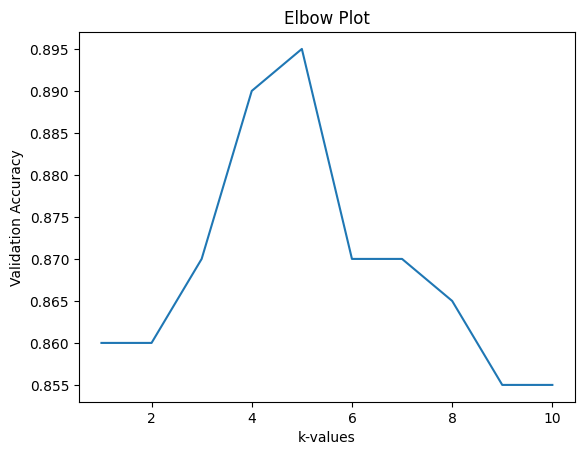

In [13]:
# Reduce memory usage, use a smaller sample of the data
X_train_2D = X_train_2D[:1000]
y_train = y_train[:1000]
X_val_2D = X_val_2D[:200]
y_val = y_val[:200]
X_test_2D = X_test_2D[:200]
y_test = y_test[:200]

# 2. Hyperparameter Tuning
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Define a set of k-values
k_values = range(1, 11)

# Initialize a list to store the accuracies
accuracy_scores = []

# Iterate over k-values
for k in k_values:
    #Initialize KNN classifier with current k-value
    knn = KNeighborsClassifier(n_neighbors=k)
    # Train the model using training data
    knn.fit(X_train_2D, y_train)
    # Make predictions on validation data
    y_val_pred = knn.predict(X_val_2D)
    # Calculate accuracy score
    accuracy = accuracy_score(y_val, y_val_pred)
    # Append accuracy score to the list
    accuracy_scores.append(accuracy)
    print(f'k={k}, accuracy={accuracy}')

# Elbow plot the validation accuracy against k-values
plt.plot(k_values, accuracy_scores)
plt.xlabel('k-values')
plt.ylabel('Validation Accuracy')
plt.title('Validation accuracy for different k in KNN')
plt.show()

In [10]:
# # 2. Hyperparameter Tuning
# # Train the models for a set of k-values using the training data and make predictions on the validation data.
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Train the models for a set of k-values using the training data.
# k_values = [1, 3, 5, 7, 9]
# accuracy_scores = []
# for k in k_values:
#     knn = KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X_train_2D, y_train)
#     y_val_pred = knn.predict(X_val_2D)
#     accuracy = accuracy_score(y_val, y_val_pred)
#     accuracy_scores.append(accuracy)
#     print(f'k={k}, accuracy={accuracy}')

# # Make predictions on the validation data.
# plt.plot(k_values, accuracy_scores)
# plt.xlabel('k')
# plt.ylabel('accuracy')
# plt.title('Validation Accuracy vs. k')
# plt.show()